In [32]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
import pandas as pd

In [33]:
origin=pd.read_csv('영상정보_홍사운드(200개).csv',encoding='cp949')
origin['view']=origin['view'].str.replace('조회수','')
origin['view']=origin['view'].str.replace('회','')
origin['view']=origin['view'].str.replace(',','')

In [34]:
origin['like']=origin['like'].str.replace('천','00')
origin['like']=origin['like'].str.replace('만','000')
origin['like']=origin['like'].str.replace('.','')
origin['unlike']=origin['unlike'].str.replace('천','00')
origin['unlike']=origin['unlike'].str.replace('.','')

In [35]:
origin['comment']=origin['comment'].str.replace('댓글','')
origin['comment']=origin['comment'].str.replace('개','')
origin['comment']=origin['comment'].str.replace(',','')
Hongdata=origin
Hongdata

,title,view,like,unlike,comment,date
0,속편한 음식 땡길 땐 트러플전복죽 김치낙지죽 육쪽마늘죽 리얼사운드 먹방 | 본죽 모...,31857,953,14,165,2020. 12. 16.
1,열라면에 해물듬뿍 넣고 추운날 야외 리얼사운드 먹방 | 문어 순두부 열라면 | Sp...,134018,4100,76,445,2020. 12. 14.
2,엽떡에 곱창 조합 미쳤네요 엽기떡볶이 매운맛 리얼사운드 먹방 | 천사곱창 김말이 |...,132150,3100,61,206,최초 공개: 2020. 12. 12.
3,후라이드 치킨이 신메뉴라고요?! 리얼사운드 먹방 | 교촌 리얼후라이드 교촌버거 마라...,326402,4600,136,441,최초 공개: 2020. 12. 9.
4,편의점 컵라면 도시락 디저트 리얼사운드 먹방 | convenience store f...,186052,3800,79,460,2020. 11. 30.
5,간장게장 양념게장 만족감 폭발 리얼사운드 먹방 | Soy sauce marinat...,377912,9300,165,807,2020. 11. 25.
6,맘스터치 New후라이드통다리 리얼사운드 먹방 | 신메뉴 리얼비프버거 알룰로스 양념치...,286186,4600,121,471,2020. 11. 21.
7,BBQ치본스테이크 신메뉴 리얼사운드 먹방 | Korean Chicken EATING...,404944,7100,233,1323,2020. 11. 17.
8,연어초밥 듬뿍에 오독오독 광어회 먹방,296045,6400,128,578,2020. 11. 15.
9,튀긴 통삼겹에 김장김치 쫙쫙찢어 리얼사운드 먹방 | 새오프닝송 | KIMCHI & ...,303852,6500,140,623,2020. 11. 13.


In [36]:
Hongdata['view'] = Hongdata['view'].astype('float64')
Hongdata['view'].mean()

604079.095

In [37]:
Hongdata['view'] = Hongdata['view'].astype('float64')
Hongdata['like'] = Hongdata['like'].astype('float64')
Hongdata['unlike'] = Hongdata['unlike'].astype('float64')
Hongdata['comment'] = Hongdata['comment'].astype('float64')

In [38]:
heat = Hongdata[['view','like','unlike','comment']].corr()

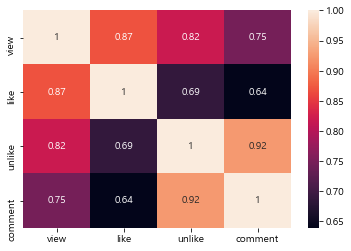

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
sns.heatmap(heat,annot=True)
plt.savefig('홍사운드상관도.png')

In [40]:
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용
from konlpy.tag import Komoran
import re

In [41]:
Hongdata

,title,view,like,unlike,comment,date
0,속편한 음식 땡길 땐 트러플전복죽 김치낙지죽 육쪽마늘죽 리얼사운드 먹방 | 본죽 모...,31857.0,953.0,14.0,165.0,2020. 12. 16.
1,열라면에 해물듬뿍 넣고 추운날 야외 리얼사운드 먹방 | 문어 순두부 열라면 | Sp...,134018.0,4100.0,76.0,445.0,2020. 12. 14.
2,엽떡에 곱창 조합 미쳤네요 엽기떡볶이 매운맛 리얼사운드 먹방 | 천사곱창 김말이 |...,132150.0,3100.0,61.0,206.0,최초 공개: 2020. 12. 12.
3,후라이드 치킨이 신메뉴라고요?! 리얼사운드 먹방 | 교촌 리얼후라이드 교촌버거 마라...,326402.0,4600.0,136.0,441.0,최초 공개: 2020. 12. 9.
4,편의점 컵라면 도시락 디저트 리얼사운드 먹방 | convenience store f...,186052.0,3800.0,79.0,460.0,2020. 11. 30.
5,간장게장 양념게장 만족감 폭발 리얼사운드 먹방 | Soy sauce marinat...,377912.0,9300.0,165.0,807.0,2020. 11. 25.
6,맘스터치 New후라이드통다리 리얼사운드 먹방 | 신메뉴 리얼비프버거 알룰로스 양념치...,286186.0,4600.0,121.0,471.0,2020. 11. 21.
7,BBQ치본스테이크 신메뉴 리얼사운드 먹방 | Korean Chicken EATING...,404944.0,7100.0,233.0,1323.0,2020. 11. 17.
8,연어초밥 듬뿍에 오독오독 광어회 먹방,296045.0,6400.0,128.0,578.0,2020. 11. 15.
9,튀긴 통삼겹에 김장김치 쫙쫙찢어 리얼사운드 먹방 | 새오프닝송 | KIMCHI & ...,303852.0,6500.0,140.0,623.0,2020. 11. 13.


In [42]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [43]:
kkma = Kkma()

In [44]:
#영상제목 토큰화 하는 과정
noun_final = []
for text in range(len(Hongdata)):
    noun0=kkma.pos(Hongdata['title'].iloc[text])
    noun=[]
    for i,j in noun0:
        if j=='NNG':
            if i == '방송' or i=='로드' or i=='교시':
                pass
            else:
                noun.append(i)
    noun_final.append(noun)
Hongdata['token'] = noun_final

# 토큰화 작업을 거친 뒤에 단어가 하나인 것은 제외하기
noun_ls = []
for i in range(len(Hongdata)):
    noun_ls0=[]
    for j in range(len(Hongdata['token'].iloc[i])):
        if len(Hongdata['token'].iloc[i][j]) == 1:
            pass
        else:
            noun_ls0.append(Hongdata['token'].iloc[i][j])
    noun_ls.append(list(set(noun_ls0))) #중복제거

In [45]:
Hongdata['token2'] = noun_ls
pd.set_option('display.max_rows', 200)

In [53]:
Hongdata.drop('token',axis=1)
Hongdata.to_csv('HongSound.csv',encoding='cp949')

In [50]:
webData

In [15]:
token_df = pd.DataFrame({'token':[]})
for i in range(len(Hongdata)):
    insert_data = pd.DataFrame({'token':Hongdata['token2'].iloc[i]})
    insert_data['view'] = Hongdata['view'].iloc[i]
    
    token_df = token_df.append(insert_data)
token_df['view'] = token_df['view'].astype('float64')
token_df2 = token_df.groupby('token')['view'].sum().reset_index()
token_df2['count'] = token_df.groupby(['token']).count().reset_index()['view'].tolist()
view_count = []
for i in range(len(token_df2)):
    a = token_df2['view'].iloc[i]/token_df2['count'].iloc[i]
    view_count.append(a)
token_df2['view_count'] = view_count
token_df2.sort_values(by='count',ascending=False).head(15)

,token,view,count,view_count
179,사운드,96193003.0,154,6.246299e+05
101,리얼,90192406.0,115,7.842818e+05
331,치킨,17050080.0,29,5.879338e+05
330,치즈,28910228.0,29,9.969044e+05
118,메뉴,11168820.0,15,7.445880e+05
94,떡볶이,9387218.0,14,6.705156e+05
28,고추,6373716.0,11,5.794287e+05
49,김치,5045772.0,11,4.587065e+05
396,허니콤,12708022.0,11,1.155275e+06
237,양념,4048382.0,10,4.048382e+05


In [16]:
token_df = pd.DataFrame({'token':[]})
for i in range(len(Hongdata)):
    insert_data = pd.DataFrame({'token':Hongdata['token2'].iloc[i]})
    insert_data['like'] = Hongdata['like'].iloc[i]
    
    token_df = token_df.append(insert_data)
token_df = token_df[token_df['like']!='좋아요']
token_df['like'] = token_df['like'].astype('float64')
token_df2 = token_df.groupby('token')['like'].sum().reset_index()
token_df2['count'] = token_df.groupby(['token']).count().reset_index()['like'].tolist()
view_count = []
for i in range(len(token_df2)):
    a = token_df2['like'].iloc[i]/token_df2['count'].iloc[i]
    view_count.append(a)
token_df2['like_count'] = view_count
token_df2.sort_values(by='like_count',ascending=False).head(15)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,token,like,count,like_count
196,소감,59000.0,1,59000.000000
316,처음,59000.0,1,59000.000000
355,튜브,55000.0,1,55000.000000
228,실태,55000.0,1,55000.000000
403,환상,53000.0,1,53000.000000
219,시작,44000.0,1,44000.000000
149,보급,42000.0,1,42000.000000
115,말씀,122000.0,3,40666.666667
240,어장,69900.0,2,34950.000000
212,스페셜,66100.0,2,33050.000000


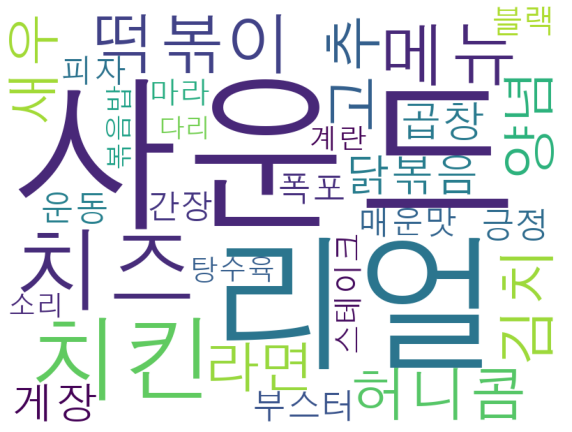

<Figure size 432x288 with 0 Axes>

In [17]:
from collections import Counter
from wordcloud import WordCloud
#import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/H2GTRM.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family



noun_list = []
for i in range(len(Hongdata)):
    for j in range(len(Hongdata['token2'].iloc[i])):
        noun_list.append(Hongdata['token2'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(30)
#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})

#wordcloud
wc = WordCloud(font_path=font_fname,background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [20]:
vec = []
for i in range(len(Hongdata)):
    vec2 = []
    tm_ls = Hongdata['token2'].iloc[i]
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

In [21]:
from gensim.models.word2vec import Word2Vec
import ast
import logging

In [22]:
model = Word2Vec(vec, min_count=3,window=3,iter=20, size=100, sg=1) #skip-gram

In [25]:
yusa=model.most_similar('리얼')

<ipython-input-25-bdba76745d28>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  yusa=model.most_similar('리얼')


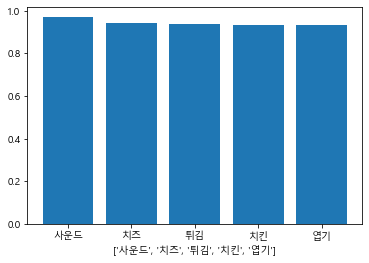

In [26]:
y=[]
x=[]
font_fname = 'C:/Windows/Fonts/malgunbd.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family
for i,j in yusa[:5]:
    y.append(j)
    x.append(i)
plt.bar(x,y)
plt.xlabel(x,fontproperties=font_family)
plt.savefig('홍사운드유사도(리얼).png')

In [81]:
from sklearn.cluster import KMeans

word_vectors = model.wv.syn0 # 어휘의 feature vector
num_clusters = int(word_vectors.shape[0]/50) # 어휘 크기의 1/5나 평균 5단어
print(num_clusters)
num_clusters = int(num_clusters)

1


<ipython-input-81-af2f4982c497>:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  word_vectors = model.wv.syn0 # 어휘의 feature vector


In [83]:
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [86]:
for c in range(num_clusters):
    # 클러스터 번호를 출력
    print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])            
    print(words)


cluster 0
['메이크업', '브랜드', '리뷰', '화장', '화장품', '핑크', '추천', '극복', '페스티벌', '프로젝트', '쇼핑', '사무실', '파티', '박스', '언니', '영상', '럭셔리', '택배', '처음', '협찬', '아이', '친구', '속옷', '주의', '토리', '브이', '뷰티', '설명', '소개', '아이템', '기초', '신상', '데일리', '베이스', '집중', '속눈썹', '크리스마스', '생활', '팬티', '데이', '제품', '할로윈', '에이', '립스틱', '사용법', '브러쉬', '대박', '수영복', '커버', '세상', '제대', '나발', '여행', '리얼', '사람', '한국', '공지', '스튜디오', '아리', '닥터', '새내기', '도전']


In [94]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

path_gothic = 'C:/Windows/Fonts/H2GTRM.ttf'
prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [76]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

<ipython-input-76-b8fca6fd9b3d>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]


In [77]:
import pandas as pd

df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])

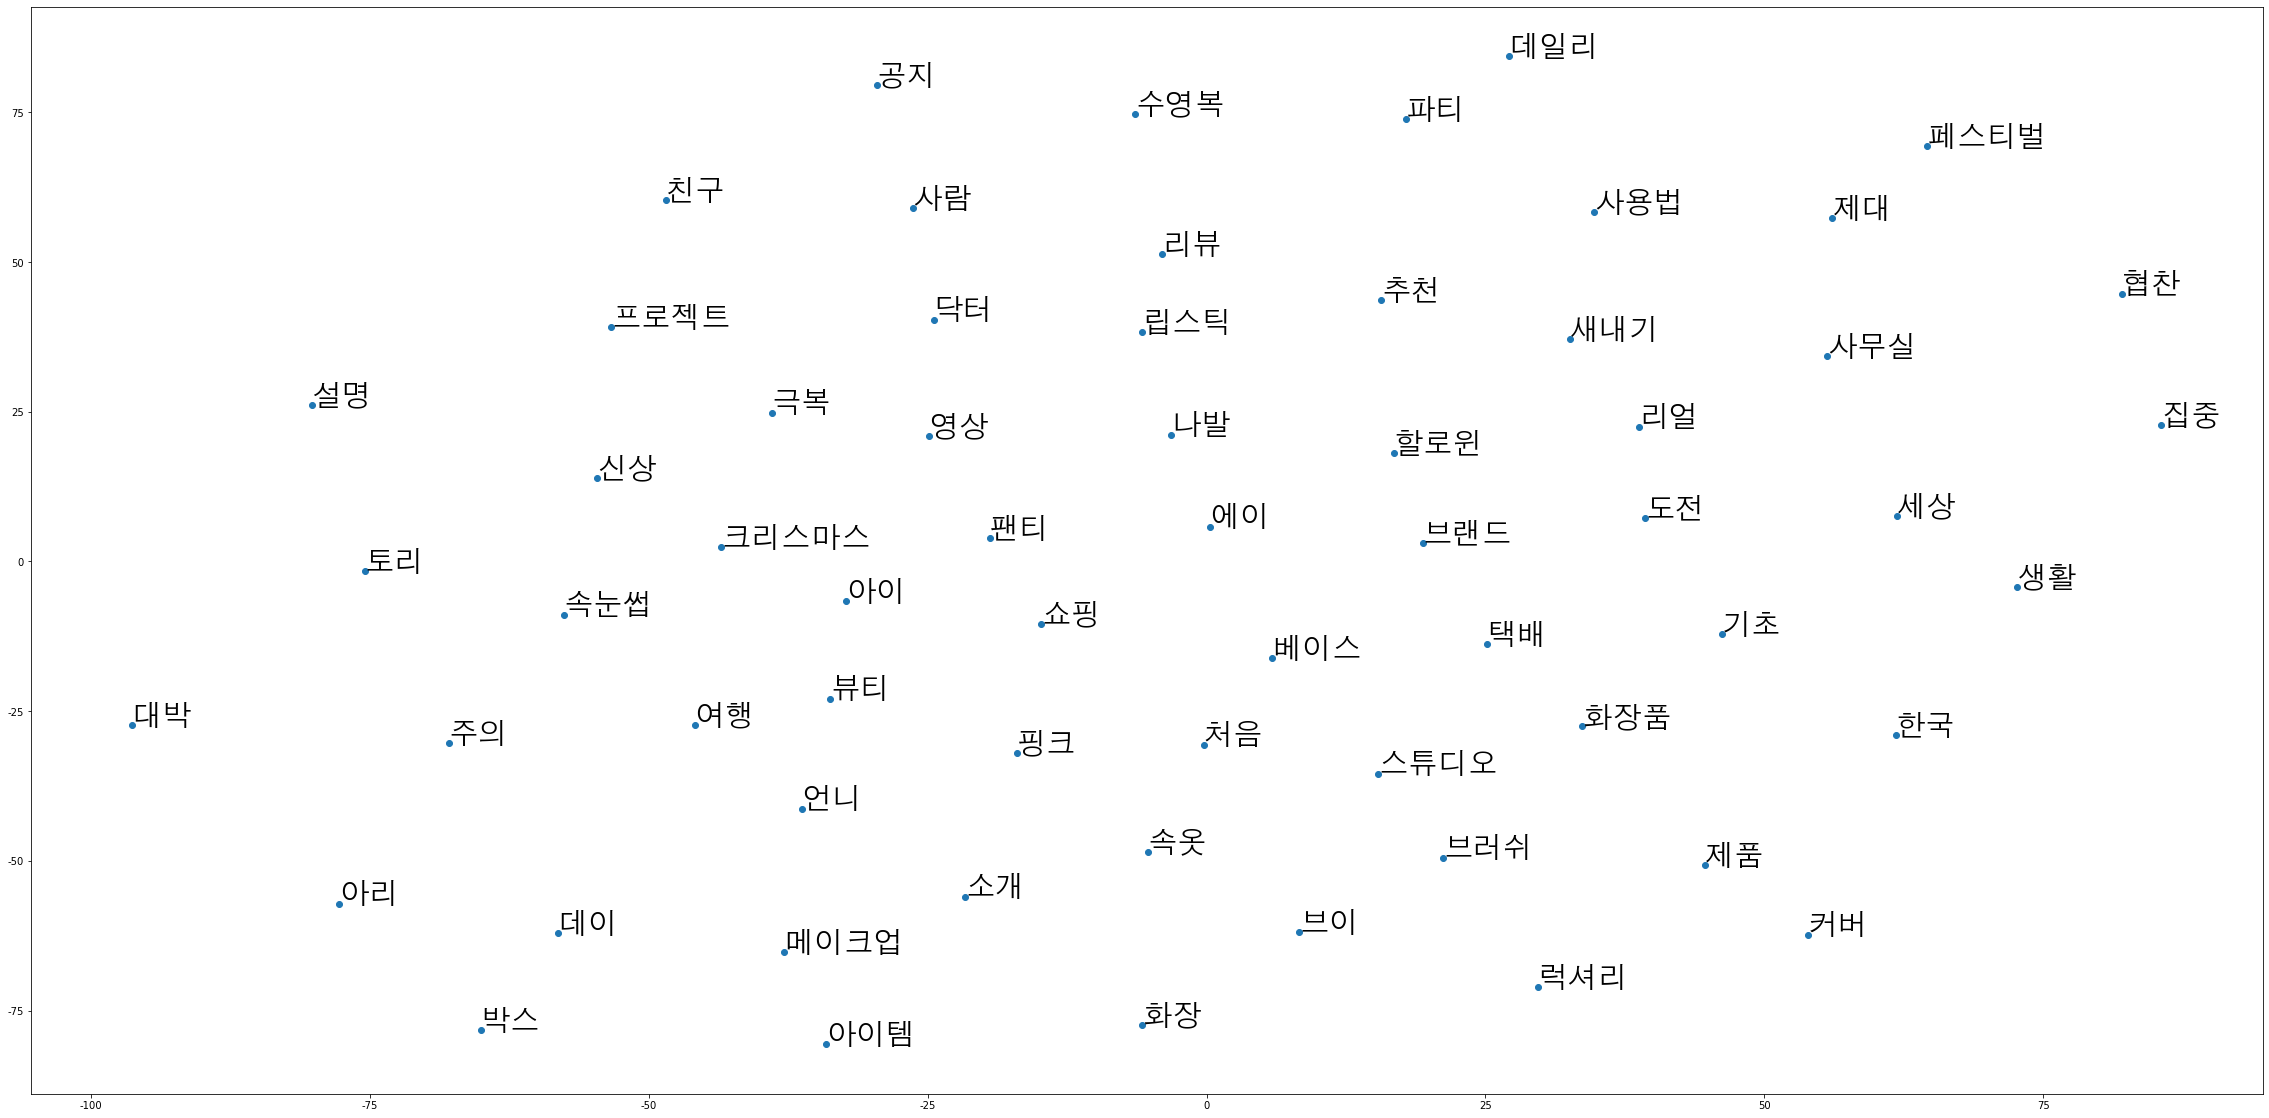

In [79]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

for word, pos in list(df.iterrows()):
    ax.annotate(word, pos, fontsize=30, fontproperties=prop)
plt.show()